In [6]:
import sys
sys.path.append('../experiments')

In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import joblib
import matplotlib.pyplot as plt
from pmsurv.models.exponential_model import ExponentialModel
import utils
import numpy as np
import pmsurv.utils

In [37]:
data = joblib.load('best_models/exp/data.pkl')
selector = joblib.load('best_models/exp/selector.pkl')
model = ExponentialModel()
model.load('best_models/exp/model.yaml')

In [47]:
X_train, X_test, y_train, y_test = data

In [80]:
X_selected = selector.transform(X_test)
surv, _, _ = model.predict(X_selected)
t_plot_e = pmsurv.utils.get_time_axis(0, model.max_time, 10)
surv_med = t_plot_e[np.argmax(surv < 0.5, axis=1)]
#surv_med = np.median(surv, axis=1)

Sampling: []


In [84]:
y_test[:, 0]

array([ 0,  5,  0,  0,  0,  0,  3,  0,  3,  0,  1,  3, 33,  3, 15,  4,  2,
        3,  1,  0,  0,  0,  0,  0,  0, 11,  1,  0])

(0.0, 6.0)

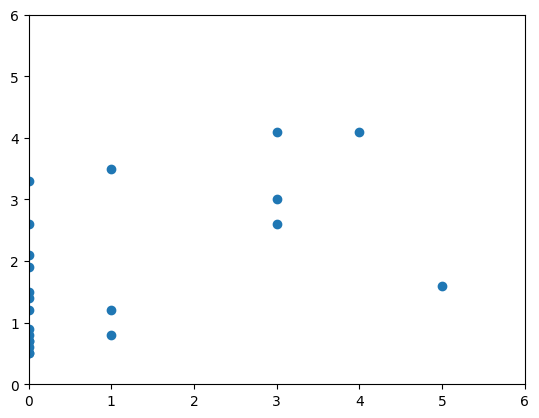

In [85]:
plt.scatter(y_test[:, 0], surv_med)
plt.xlim(0, 6)
plt.ylim(0, 6)